In [1]:
import pickle
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

zall_file = '/home/dipiano/E4/irf_random/crab/irf_random_full_ds_snr.txt'
z20_file = '/home/dipiano/E4/irf_z20/crab/irf_z20_full_ds_snr.txt'

zall = pd.read_csv(zall_file, sep=' ', header=0).sort_values(by=['seed']).dropna()
z20 = pd.read_csv(z20_file, sep=' ', header=0).sort_values(by=['seed']).dropna()  

len(zall), len(z20)

(17286, 17277)

In [2]:
zall.head()

,seed,loc_ra,loc_dec,offset,counts_on,counts_off,alpha,excess,excess_err,sigma,snr,aeff
2,3,76.894712,-66.343824,0.982496,145.0,617.0,0.083333,93.583333,27.604347,10.048215,3.510678,0.0
3,4,125.480814,-44.467154,1.118714,189.0,708.0,0.071429,138.428571,29.949958,14.058160,4.758067,0.0
4,5,214.105104,42.757503,1.369858,161.0,771.0,0.055556,118.166667,30.528675,13.177265,3.962811,0.0
5,6,352.536952,43.604779,0.532969,89.0,110.0,0.200000,67.000000,14.106736,9.240755,5.036028,0.0
6,7,42.802217,86.979388,0.458603,164.0,101.0,0.250000,138.750000,16.278821,14.856795,8.960942,0.0


In [3]:
z20.head()

,seed,loc_ra,loc_dec,offset,counts_on,counts_off,alpha,excess,excess_err,sigma,snr,aeff
0,1,316.619078,12.616735,0.300524,493.0,192.0,1.000000,301.000000,26.172505,11.699919,13.556358,0.0
1,2,16.523037,78.046384,0.491497,392.0,850.0,0.250000,179.500000,35.242020,9.607832,5.594371,0.0
2,3,340.484204,-17.460856,0.374577,492.0,340.0,0.500000,322.000000,28.844410,15.207882,12.514885,0.0
3,4,344.170518,86.466960,1.862478,175.0,2763.0,0.037037,72.666667,54.203321,6.374312,1.364607,0.0
4,5,214.891906,34.429314,1.657599,201.0,2763.0,0.043478,80.869565,54.442630,6.552376,1.516458,0.0


In [4]:
def snr2(excess, off, alpha):
    snr2 = excess / np.sqrt(excess + 2*(off*alpha))
    return snr2

def snr3(excess, off):
    snr3 = excess / np.sqrt(off)
    return snr3

def snr4(excess, off, alpha):
    snr4 = excess / (off*alpha)
    return snr4

def snr5(excess, off, alpha):
    snr5 = excess / np.sqrt(off*alpha)
    return snr5

In [5]:
zall['snr2'] = snr2(zall['excess'], zall['counts_off'], zall['alpha'])
z20['snr2'] = snr2(z20['excess'], z20['counts_off'], z20['alpha'])

zall['snr3'] = snr3(zall['excess'], zall['counts_off'])
z20['snr3'] = snr3(z20['excess'], z20['counts_off'])

zall['snr4'] = snr4(zall['excess'], zall['counts_off'], zall['alpha'])
z20['snr4'] = snr4(z20['excess'], z20['counts_off'], z20['alpha'])

zall['snr5'] = snr5(zall['excess'], zall['counts_off'], zall['alpha'])
z20['snr5'] = snr5(z20['excess'], z20['counts_off'], z20['alpha'])

In [6]:
import matplotlib.patches as mpatches

colors = ['orange', 'navy'] # ['navy', 'orange'] # 
labels = ['random zenith', '20° zenith'] # ['20° zenith', 'random zenith'] # 
hatches = ['\\', '//'] # ['//', '\\'] # 
histsize = (8,8)
fs = 16
nbins = 50
legends = [mpatches.Patch(facecolor='none', edgecolor=colors[0], hatch=hatches[0]), 
           mpatches.Patch(facecolor='none', edgecolor=colors[1], hatch=hatches[1])]

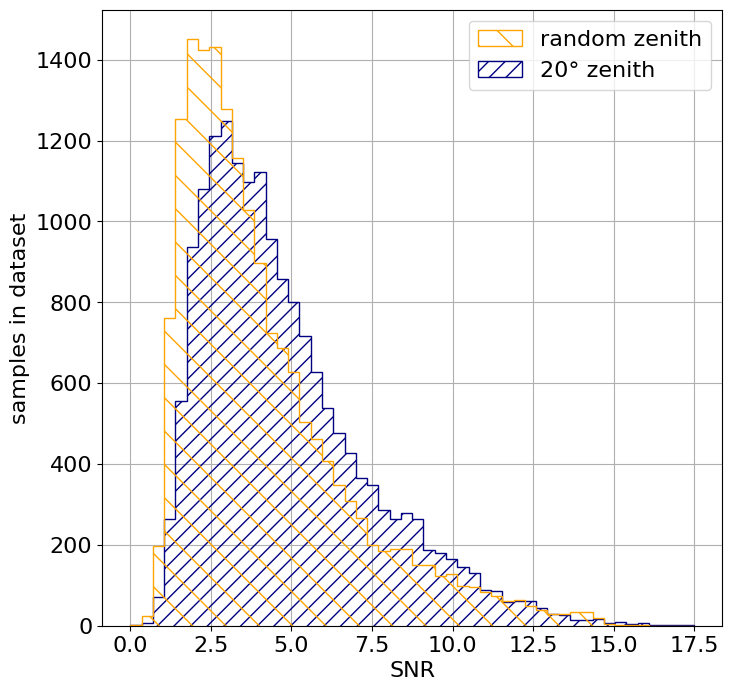

(0.1257350953485232, 17.493910174797502)

In [7]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr'], zall['snr'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr_z20_zALL.png')

min(zall['snr']), max(zall['snr'])

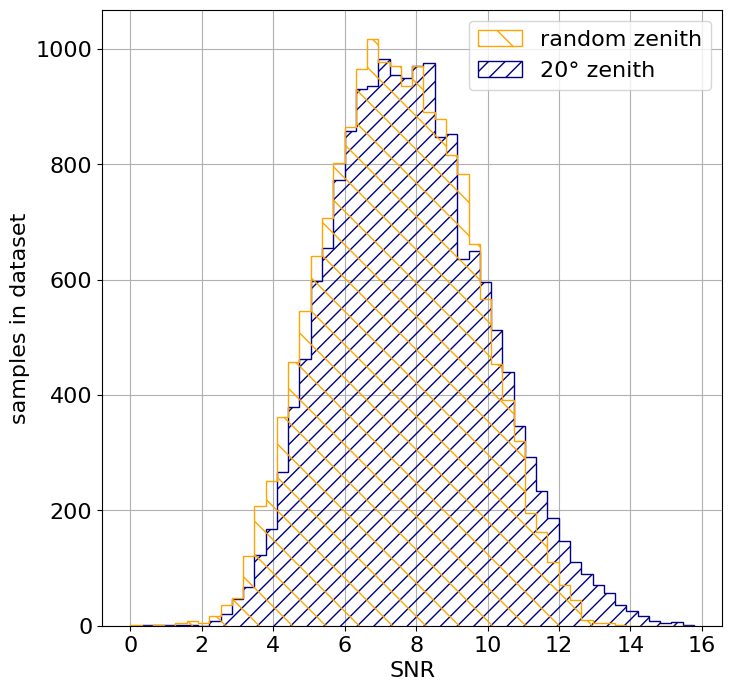

(0.36323446629480194, 15.77933337531571)

In [8]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr2'], zall['snr2'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr2_z20_zALL.png')

min(zall['snr2']), max(zall['snr2'])

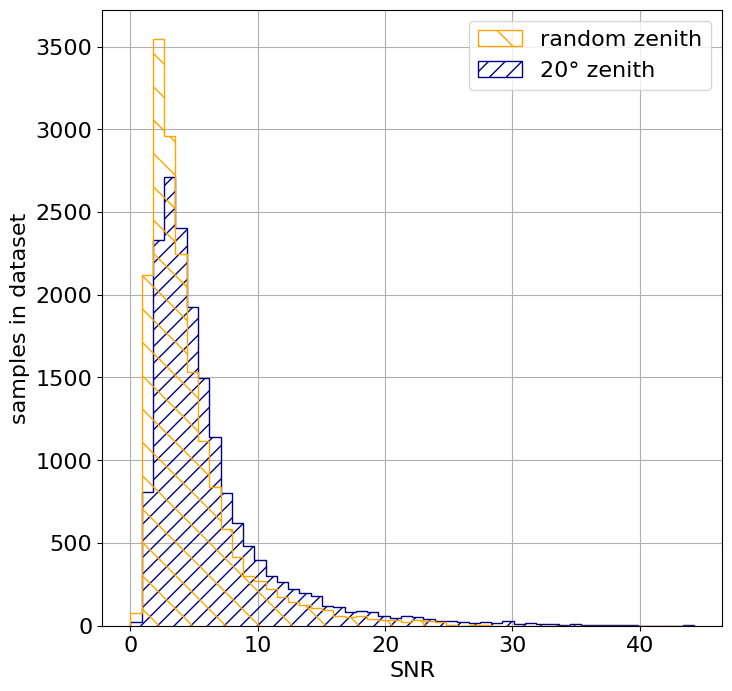

(0.1258903933991478, 44.246634966767274, 6.075468018631367)

In [12]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr3'], zall['snr3'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr3_z20_zALL.png')

min(zall['snr3']), max(zall['snr3']), np.mean(zall['snr3'])

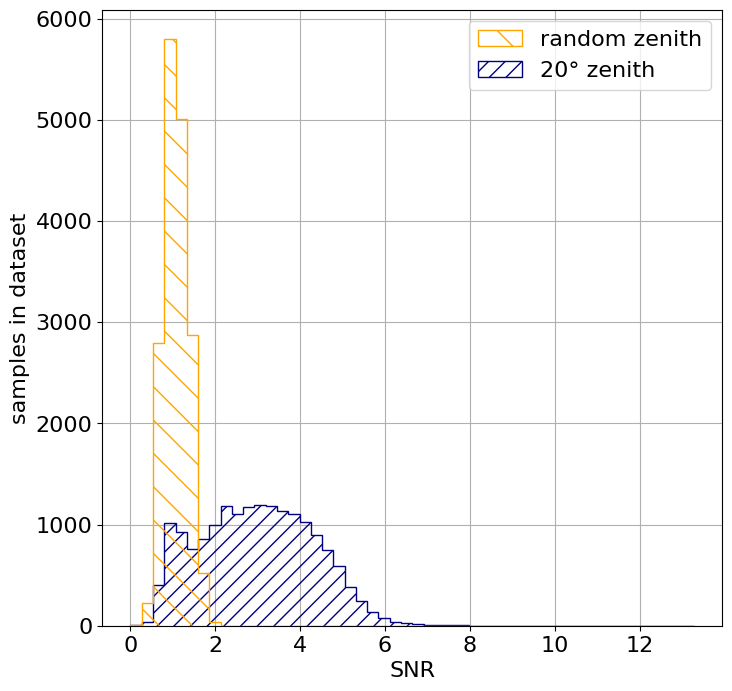

(0.04202004626060136, 13.285714285714286)

In [10]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr4'], zall['snr4'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr4_z20_zALL.png')

min(zall['snr4']), max(zall['snr4'])

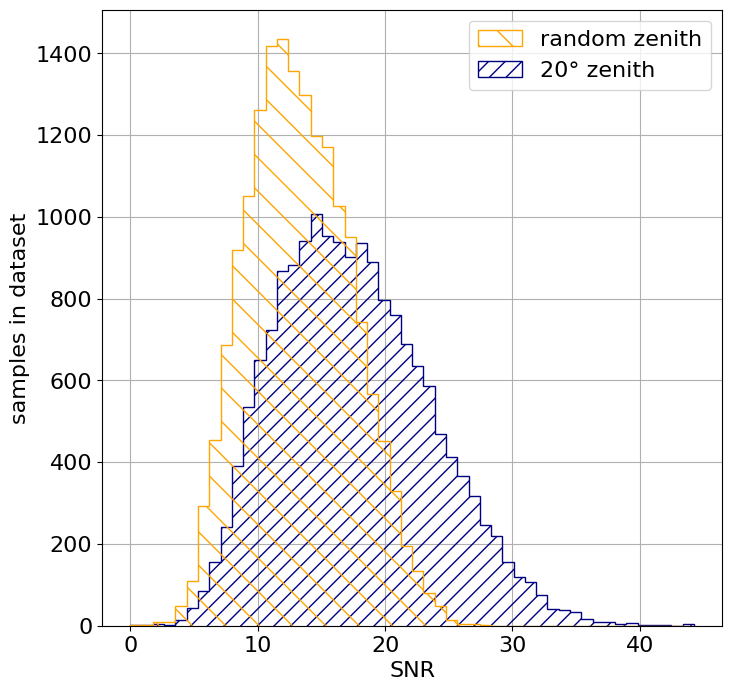

(0.5190593892352466, 44.246634966767274)

In [11]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['snr5'], zall['snr5'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_snr5_z20_zALL.png')

min(zall['snr5']), max(zall['snr5'])

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['excess'], zall['excess'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('source excess', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_excess_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['counts_off'], zall['counts_off'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('background counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_offcounts_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['counts_off']*z20['alpha'], zall['counts_off']*zall['alpha'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('background counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_offcounts_normed_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['counts_on'], zall['counts_on'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('source region counts', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_oncounts_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['sigma'], zall['sigma'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(r'sigma ($\sigma$)', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_sigma_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['alpha'], zall['alpha'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(r'$\alpha \; (1/N_{reg})$', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_alpha_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (z20['offset'], zall['offset'])
n, bins, patches = ax.hist(data, 20, density=False, histtype='step', color=colors)
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel(r'$\alpha \; (1/N_{reg})$', fontsize=fs)
ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/all_dataset_offset_z20_zALL.png')

In [ ]:
# hist
fig = plt.figure(figsize=histsize)
ax = fig.add_subplot(111)

data = (zall['snr5'])
n, bins, patches = ax.hist(data, nbins, density=False, histtype='step', color=colors[-1])
ax.tick_params(axis='both', labelsize=fs)
ax.set_ylabel('samples in dataset', fontsize=fs)
ax.set_xlabel('SNR', fontsize=fs)
#ax.legend(handles=legends, labels=labels, fontsize=fs)
ax.grid()
for patch, hatch in zip(patches, hatches):
    plt.setp(patch, hatch=hatch)
plt.show()
fig.savefig(f'img/zALL_dataset_snr5.png')